<a href="https://colab.research.google.com/github/toraaglobal/SREIT/blob/master/01_OBTAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Defination
* The research question is can we predict which three zip codes provide the best investment opportunity for the Syracuse Real Estate Investment Trust (SREIT)?
* Develop model(s) for forecasting average median housing value by zip code for 2018
* historical data from 1997 through 2017 is used as the training data
* What three zip codes provide the best investment opportunity for the SREIT?
* And Why?

## Proposed Data Source/Data of Interest
*  Zillow Data: `files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv`
* Bureau of Labor Statistics and Census data : gdp 
* Crime rate data 
* Property tax
* School Data: Univerty Present or Not

## OBTAIN

In [0]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!wget --no-check-certificate \
    "files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv" \
    -O "/tmp/SingleFamilyResidence.csv"

--2019-05-10 06:23:24--  http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv
Resolving files.zillowstatic.com (files.zillowstatic.com)... 99.84.239.93, 99.84.239.66, 99.84.239.4, ...
Connecting to files.zillowstatic.com (files.zillowstatic.com)|99.84.239.93|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28914607 (28M) [binary/octet-stream]
Saving to: ‘/tmp/SingleFamilyResidence.csv’

/tmp/SingleFamilyRe 100%[===================>]  27.57M  54.5MB/s    in 0.5s    

2019-05-10 06:23:25 (54.5 MB/s) - ‘/tmp/SingleFamilyResidence.csv’ saved [28914607/28914607]



In [3]:
## OBTAIN

# read data



single_family =pd.read_csv('/tmp/SingleFamilyResidence.csv',encoding='latin-1')
single_family.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1043100,1043900,1045300,1048400,1050600,1049700,1049900,1053700,1060100,1063400
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,335800,336900,338400,338600,337000,336100,335900,335200,334000,333000
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1323800,1322100,1321500,1320100,1319600,1321400,1324800,1329900,1337300,1339900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,176800,177400,178100,178700,179500,180300,181000,182000,183100,183600
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,123000,123700,124600,125700,126400,126800,127600,128100,128600,129000


In [4]:
single_family.shape

(15481, 283)

In [5]:
## SCRUB

# converting dataframe from wide to long
# shape from wide to long with melt function in pandas

single_family_long = pd.melt(single_family, id_vars=['RegionID','RegionName','City','State',	'Metro','CountyName','SizeRank'], var_name='Date', value_name='Values')

single_family_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Values
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,1996-04,337200.0
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,1996-04,210400.0
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1996-04,502900.0
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1996-04,95400.0
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,1996-04,77300.0


In [6]:
## Data Quality check

single_family_long.isnull().any()

RegionID      False
RegionName    False
City          False
State         False
Metro          True
CountyName    False
SizeRank      False
Date          False
Values         True
dtype: bool

In [7]:
# check the percentage of null values
(single_family_long.isnull().sum()/len(single_family_long)) * 100

RegionID      0.000000
RegionName    0.000000
City          0.000000
State         0.000000
Metro         8.765584
CountyName    0.000000
SizeRank      0.000000
Date          0.000000
Values        4.220789
dtype: float64

In [8]:
## 9% of metro is null
## 4% of housing values is null

## chech dataframe info
single_family_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272756 entries, 0 to 4272755
Data columns (total 9 columns):
RegionID      int64
RegionName    int64
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
Date          object
Values        float64
dtypes: float64(1), int64(3), object(5)
memory usage: 293.4+ MB


In [0]:
## convert datatype
single_family_long['RegionName'] = single_family_long['RegionName'].astype(str)
single_family_long['RegionID'] = single_family_long['RegionName'].astype(str)

## convert Date column to datetime
single_family_long['Date'] = pd.to_datetime(single_family_long['Date'])

In [10]:
## get description of the numeric variables
single_family_long.describe()

,SizeRank,Values
count,4.272756e+06,4.092412e+06
mean,7.741000e+03,2.062664e+05
std,4.468980e+03,2.422257e+05
min,1.000000e+00,1.120000e+04
25%,3.871000e+03,9.620000e+04
50%,7.741000e+03,1.458000e+05
75%,1.161100e+04,2.353000e+05
max,1.548100e+04,1.933810e+07


In [11]:
## Get description of the categorical variables
single_family_long.describe(include=['O'])

,RegionID,RegionName,City,State,Metro,CountyName
count,4272756,4272756,4272756,4272756,3898224,4272756
unique,15481,15481,7929,51,775,1329
top,12958,12958,New York,CA,New York-Newark-Jersey City,Los Angeles County
freq,276,276,32292,339756,213624,72864


In [12]:
## print data : top 5
single_family_long.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Values
0,60657,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,1996-04-01,337200.0
1,77494,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,1996-04-01,210400.0
2,60614,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1996-04-01,502900.0
3,77449,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1996-04-01,95400.0
4,79936,79936,El Paso,TX,El Paso,El Paso County,5,1996-04-01,77300.0


In [13]:
## get dataframe info
single_family_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272756 entries, 0 to 4272755
Data columns (total 9 columns):
RegionID      object
RegionName    object
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
Date          datetime64[ns]
Values        float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 293.4+ MB


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.195000e+03, 1.059300e+05, 1.094707e+06, 1.758453e+06,
        8.458390e+05, 2.410080e+05, 3.589300e+04, 6.516000e+03,
        6.080000e+02, 2.630000e+02]),
 array([ 9.32366906, 10.06906093, 10.81445281, 11.55984468, 12.30523655,
        13.05062843, 13.7960203 , 14.54141218, 15.28680405, 16.03219593,
        16.7775878 ]),
 <a list of 10 Patch objects>)

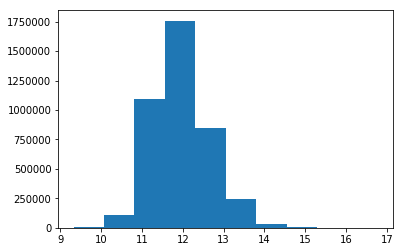

In [14]:
## distribution of housing values

plt.hist(np.log(single_family_long['Values']))

In [15]:
## Create a copy of the dataframe before data transformation

df_zip = single_family_long.copy()
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272756 entries, 0 to 4272755
Data columns (total 9 columns):
RegionID      object
RegionName    object
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
Date          datetime64[ns]
Values        float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 293.4+ MB


In [16]:
## SCRUB

# remove unwanted cols
df_zip = df_zip.drop(columns = ['RegionID','City','State','Metro','CountyName','SizeRank'])
df_zip.head()

,RegionName,Date,Values
0,60657,1996-04-01,337200.0
1,77494,1996-04-01,210400.0
2,60614,1996-04-01,502900.0
3,77449,1996-04-01,95400.0
4,79936,1996-04-01,77300.0


In [0]:
## SCRUB
# convert zip code to col names

#df_zip_wide =  df_zip.pivot(index='Date', columns='RegionName', values='Values')

#df_zip_wide.head()

In [18]:
len(df_zip['RegionName'].unique())

15481

In [19]:
## EXPLORE
## Hot Springs, Little Rock, Fayetteville, Searcy
## Subset the dataframe

## Hot Springs
df_hot_springs = single_family_long[single_family_long['Metro']== 'Hot Springs']

print(df_hot_springs.shape)
df_hot_springs.head()

(1104, 9)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Values
295,71913,71913,Hot Springs,AR,Hot Springs,Garland County,296,1996-04-01,80900.0
2670,71901,71901,Hot Springs,AR,Hot Springs,Garland County,2671,1996-04-01,67000.0
11079,71968,71968,Royal,AR,Hot Springs,Garland County,11080,1996-04-01,66100.0
12050,71964,71964,Pearcy,AR,Hot Springs,Garland County,12051,1996-04-01,71700.0
15776,71913,71913,Hot Springs,AR,Hot Springs,Garland County,296,1996-05-01,80900.0


In [20]:
## How many zip codes in hot springs
len(df_hot_springs['RegionName'].unique())

4

In [21]:
df_zip.isnull().any()

RegionName    False
Date          False
Values         True
dtype: bool

In [22]:
single_family_long.isnull().sum()


RegionID           0
RegionName         0
City               0
State              0
Metro         374532
CountyName         0
SizeRank           0
Date               0
Values        180344
dtype: int64

In [23]:
single_family_long.Metro.value_counts()

New York-Newark-Jersey City              213624
Los Angeles-Long Beach-Anaheim            95772
Chicago-Naperville-Elgin                  90804
Philadelphia-Camden-Wilmington            77832
Washington-Arlington-Alexandria           69552
Boston-Cambridge-Newton                   68448
Dallas-Fort Worth-Arlington               59064
Minneapolis-St. Paul-Bloomington          55476
Houston-The Woodlands-Sugar Land          51060
Pittsburgh                                48576
Atlanta-Sandy Springs-Roswell             44988
Miami-Fort Lauderdale-West Palm Beach     44436
Detroit-Warren-Dearborn                   42780
St. Louis                                 40848
Seattle-Tacoma-Bellevue                   39192
San Francisco-Oakland-Hayward             37260
Kansas City                               35328
Phoenix-Mesa-Scottsdale                   34776
Tampa-St. Petersburg-Clearwater           33396
Baltimore-Columbia-Towson                 33120
Riverside-San Bernardino-Ontario        

In [24]:
single_family_long.Values.describe()

count    4.092412e+06
mean     2.062664e+05
std      2.422257e+05
min      1.120000e+04
25%      9.620000e+04
50%      1.458000e+05
75%      2.353000e+05
max      1.933810e+07
Name: Values, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


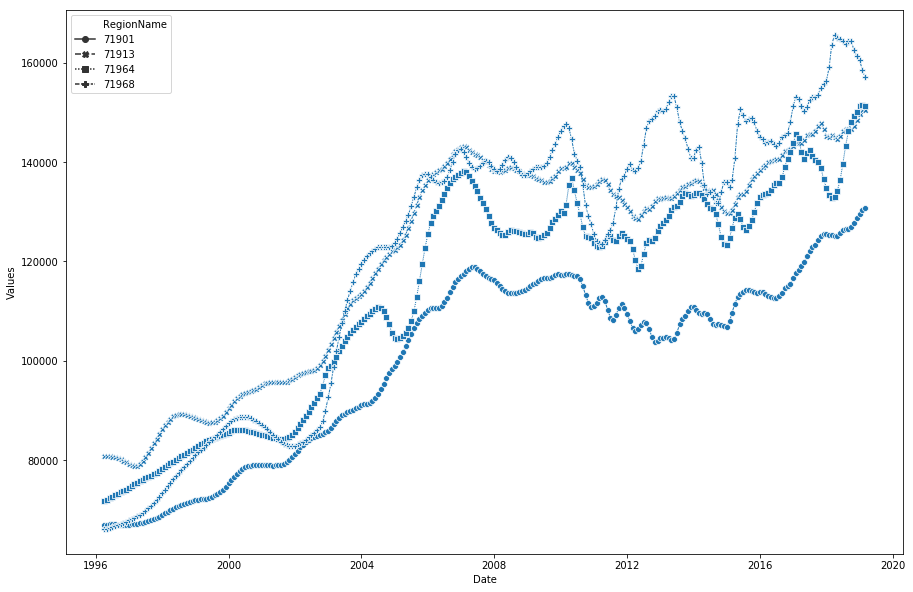

In [25]:
## plots Hot Springs

plt.figure(figsize=(15,10))
sns.lineplot(df_hot_springs['Date'],df_hot_springs['Values'], style= df_hot_springs['RegionName'],markers=True, lw=1)
plt.show()

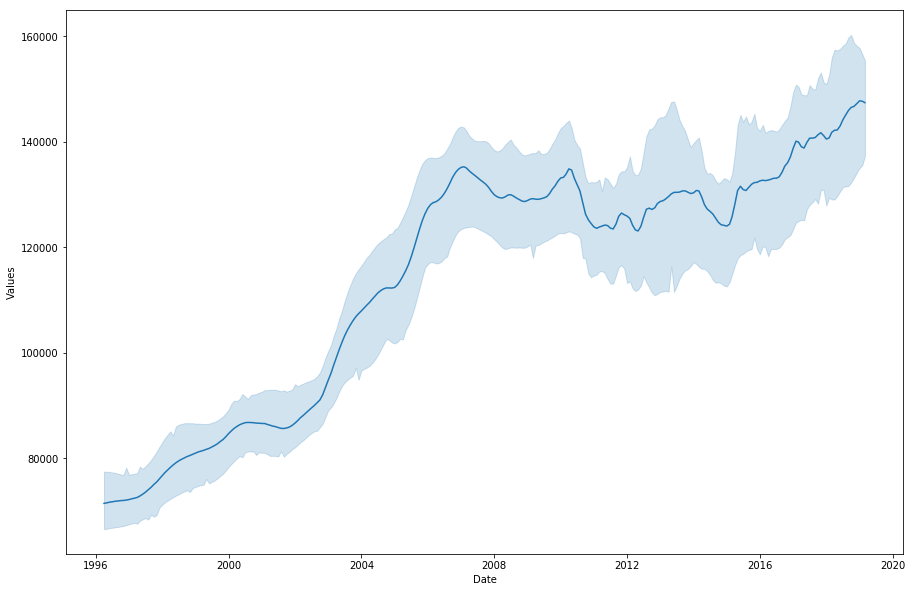

In [26]:
## plots Hot Springs

plt.figure(figsize=(15,10))
sns.lineplot(df_hot_springs['Date'],df_hot_springs['Values'])
plt.show()

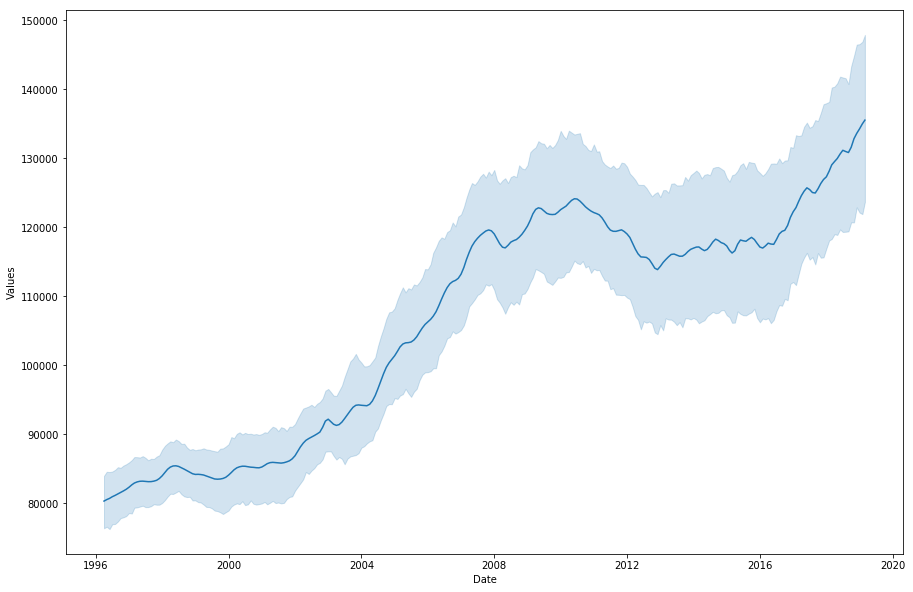

In [27]:
## Fayetteville
plt.figure(figsize= (15,10))

ax = sns.lineplot(x="Date", y="Values",data=single_family_long.query("Metro == 'Fayetteville'"))
plt.show()

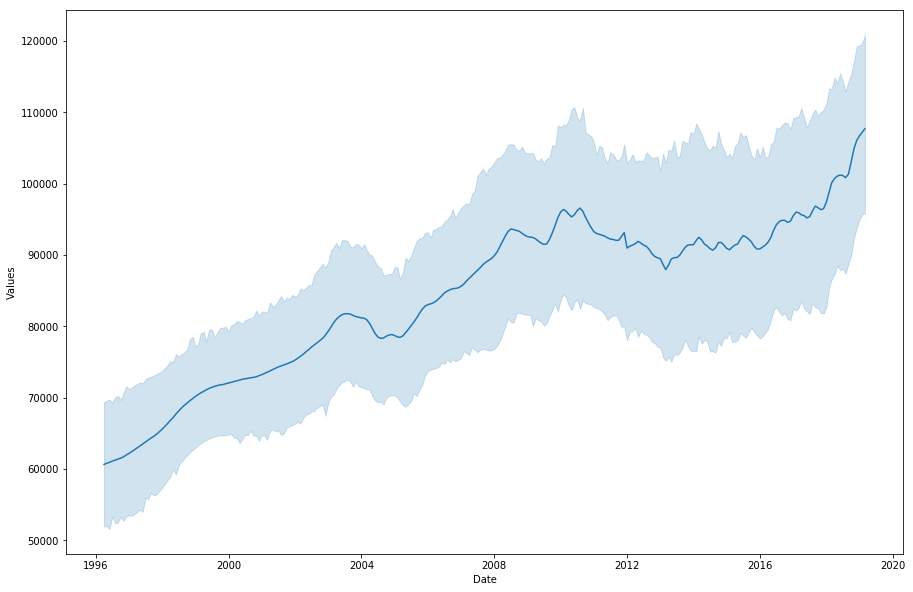

In [28]:
##  Searcy
plt.figure(figsize= (15,10))

ax = sns.lineplot(x="Date", y="Values",data=single_family_long.query("Metro == 'Searcy'"))
plt.show()

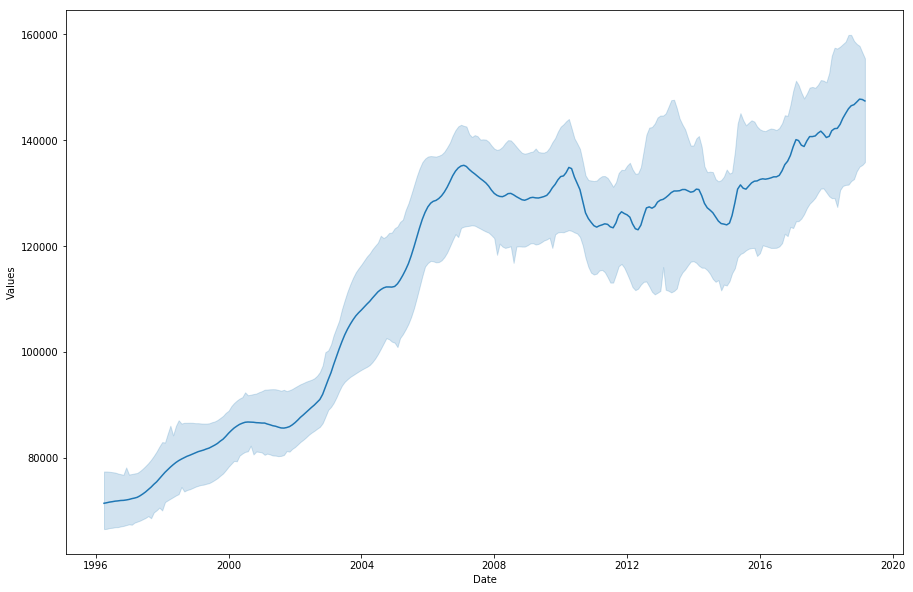

In [29]:
##  Hot Springs
plt.figure(figsize= (15,10))

ax = sns.lineplot(x="Date", y="Values",data=single_family_long.query("Metro == 'Hot Springs'"))
plt.show()

In [30]:
## group by Metro

df_metro = single_family_long.groupby(['Date','Metro']).mean().reset_index()

df_metro.head()

,Date,Metro,SizeRank,Values
0,1996-04-01,Aberdeen,10561.800000,95900.000000
1,1996-04-01,Abilene,7929.900000,63090.000000
2,1996-04-01,Ada,8223.500000,42700.000000
3,1996-04-01,Adrian,10549.400000,46040.000000
4,1996-04-01,Akron,7082.487179,100986.111111


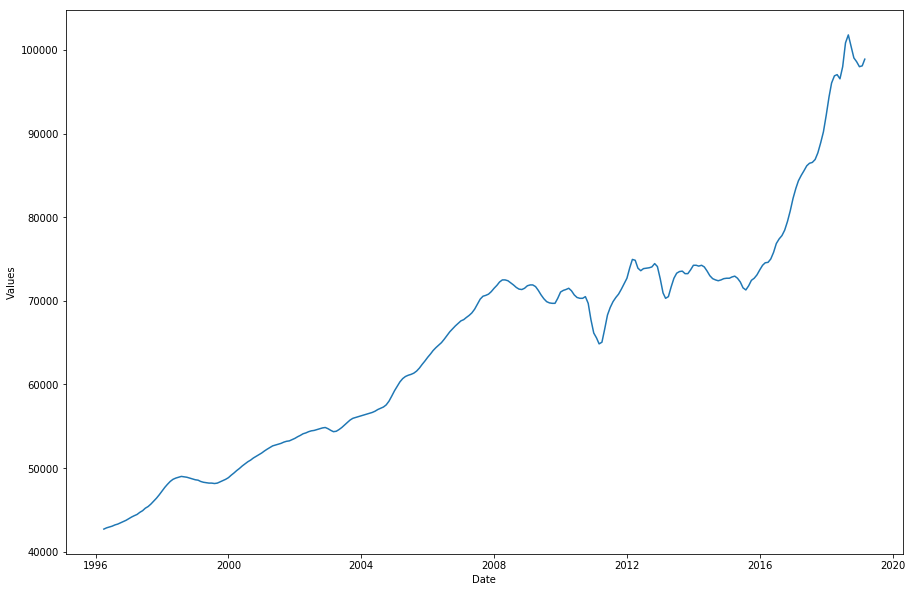

In [31]:
## Ada
plt.figure(figsize= (15,10))

ax = sns.lineplot(x="Date", y="Values",data=df_metro.query("Metro == 'Ada'"))
plt.show()

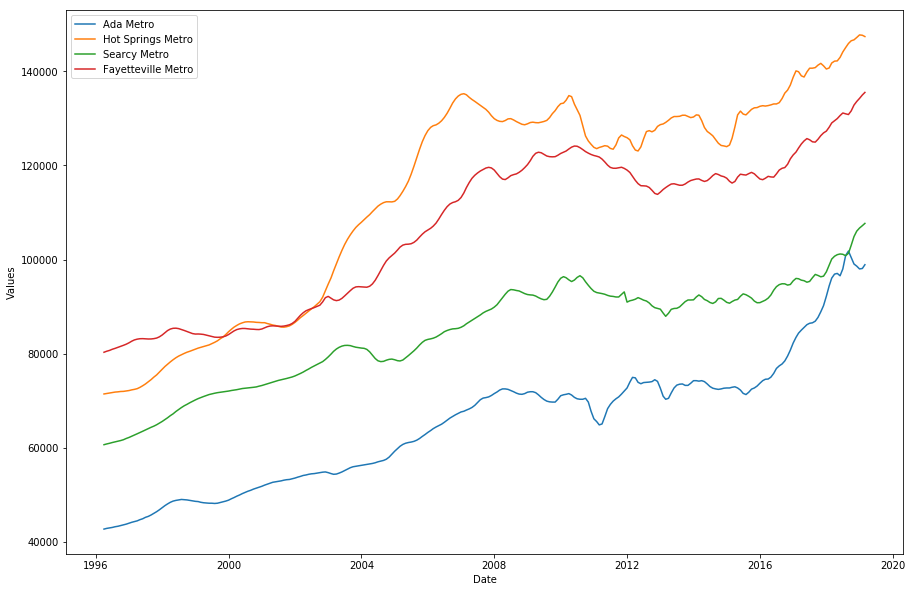

In [32]:
## 
plt.figure(figsize= (15,10))

ax = sns.lineplot(x="Date", y="Values",label='Ada Metro',data=df_metro.query("Metro == 'Ada'"))
ax = sns.lineplot(x="Date", y="Values",label='Hot Springs Metro',data=df_metro.query("Metro == 'Hot Springs'"))
ax = sns.lineplot(x="Date", y="Values",label='Searcy Metro',data=df_metro.query("Metro == 'Searcy'"))
ax = sns.lineplot(x="Date", y="Values",label='Fayetteville Metro',data=df_metro.query("Metro == 'Fayetteville'"))


plt.show()

In [33]:
%%bash

sudo apt-get install libgeos-3.5.0
sudo apt-get install libgeos-dev
sudo pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (113 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 130811 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for ma

E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [0]:
## 

from mpl_toolkits.basemap import Basemap

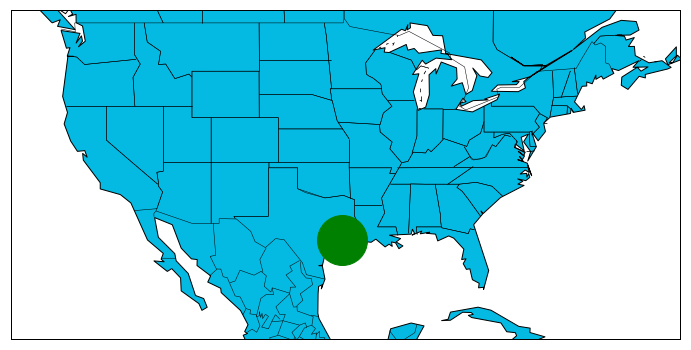

In [35]:
## basemap
plt.figure(figsize=(12,12))

m = Basemap(projection='mill', llcrnrlat= 20, urcrnrlat=50, llcrnrlon=-130, urcrnrlon=-60, resolution='c')

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lat, lon = 29.76, -95.36

x,y = m(lon,lat)

m.plot(x,y,'go', markersize=50)
plt.show()

In [36]:
len(df_metro['Metro'].unique())

775

In [37]:
## OBTAIN

## https://www.huduser.gov/portal/datasets/hads/HUDMedianIncomes1985-2009.zip
## data.gov

import os
import zipfile


!wget --no-check-certificate "https://www.huduser.gov/portal/datasets/hads/HUDMedianIncomes1985-2009.zip" -O "/tmp/HUDMedianIncomes1985-2009.zip"
  
  

local_zip = '/tmp/HUDMedianIncomes1985-2009.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2019-05-10 06:24:59--  https://www.huduser.gov/portal/datasets/hads/HUDMedianIncomes1985-2009.zip
Resolving www.huduser.gov (www.huduser.gov)... 96.127.43.83
Connecting to www.huduser.gov (www.huduser.gov)|96.127.43.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171152 (167K) [application/x-zip-compressed]
Saving to: ‘/tmp/HUDMedianIncomes1985-2009.zip’

/tmp/HUDMedianIncom 100%[===================>] 167.14K  --.-KB/s    in 0.08s   

2019-05-10 06:25:00 (2.12 MB/s) - ‘/tmp/HUDMedianIncomes1985-2009.zip’ saved [171152/171152]



In [38]:
## OBTAIN Source 2

df_med_2 = pd.read_excel('/tmp/HUD median incomes 1985-2009.xlsx')

df_med_2.head()


,IN09_SMSA,MSA_Codebook,MSA,IN85_HUDMED,IN87_HUDMED,IN89_HUDMED,IN91_HUDMED,IN93_HUDMED,IN95_HUDMED,IN97_HUDMED,IN99_HUDMED,IN01_HUDMED,IN03_HUDMED,IN05_HUDMED,IN07_HUDMED,IN09_HUDMED
0,80,"0080 Akron, OH",80,29450,31500,34800,40000,40100,41300,44300,49900,54100,60300,60700,60300.00,65000.00
1,160,"0160 Albany-Schenectady-Troy, NY",160,27450,29500,32800,37500,43800,43800,47000,49700,53000,59800,63450,63500.00,70816.67
2,200,"0200 Albuquerque, NM",200,26350,29700,32100,34600,37600,38300,44400,46100,49000,51400,54200,55900.00,59500.00
3,240,"0240 Allentown-Bethlehem-Easton, PA",240,28550,31100,33700,38600,43000,43000,45800,49400,52000,59700,60650,65800.00,70000.00
4,460,"0460 Appleton-Oshkosh-Neenah, WI",460,28650,31400,34600,40500,42400,43500,47600,53700,58000,61700,64300,66033.33,70300.00


In [47]:

## get the metro from the single family home

metro = df_metro.Metro.unique()

type(metro)

numpy.ndarray

In [0]:
metro = list(metro)

with open('/tmp/metro.data', 'w') as f:
  for met in metro:
    output = met + '\n'
    f.write(output)
f.close()

In [0]:
df_metro.to_csv('/tmp/group_by_metro.csv')

single_family_long.to_csv('/tmp/single_family_prep.csv')

1. metro.data : list of metro to geocode its longitude and latitude using google api
1. group_by_metro.csv: csv containing aggragated data by metro
1. single_family_prep.csv: Single family homes in long format